<a href="https://colab.research.google.com/github/6058ah/DataScienceStudy/blob/master/%ED%8A%B8%EB%A6%AC%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%985_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#결정 트리

In [15]:
import pandas as pd
wine = pd.read_csv('http://bit.ly/wine-date')

In [16]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [17]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [18]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [19]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [20]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [21]:
print(train_input.shape,test_input.shape)

(5197, 3) (1300, 3)


In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print(lr.coef_, lr.intercept_)

0.7808350971714451
0.7776923076923077
[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


##결정트리

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state =42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.996921300750433
0.8592307692307692


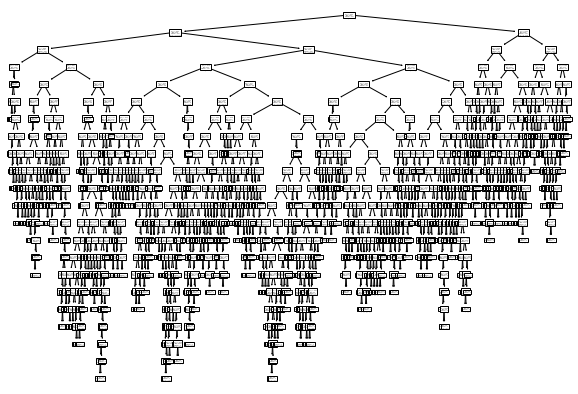

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))
plot_tree(dt)
plt.show()

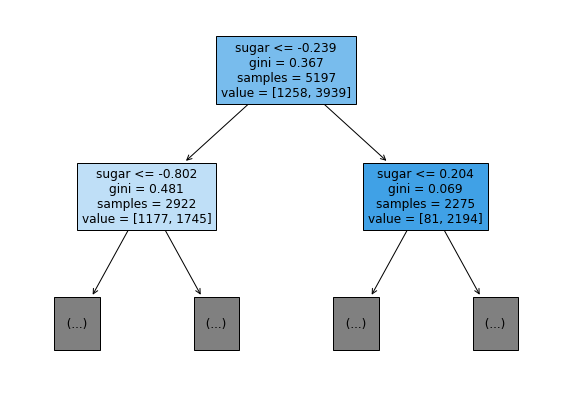

In [26]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=['alchol','sugar','pH'])
plt.show()

###가지치기
####훈련세트에는 아주 잘 맞지만 테스트세트에서 점수가 그에 못 미칠 수 있음
####일반화가 잘 안될것같은경우
### max_depth  지정

In [27]:
dt = DecisionTreeClassifier(max_depth=3,random_state =42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8454877814123533
0.8415384615384616


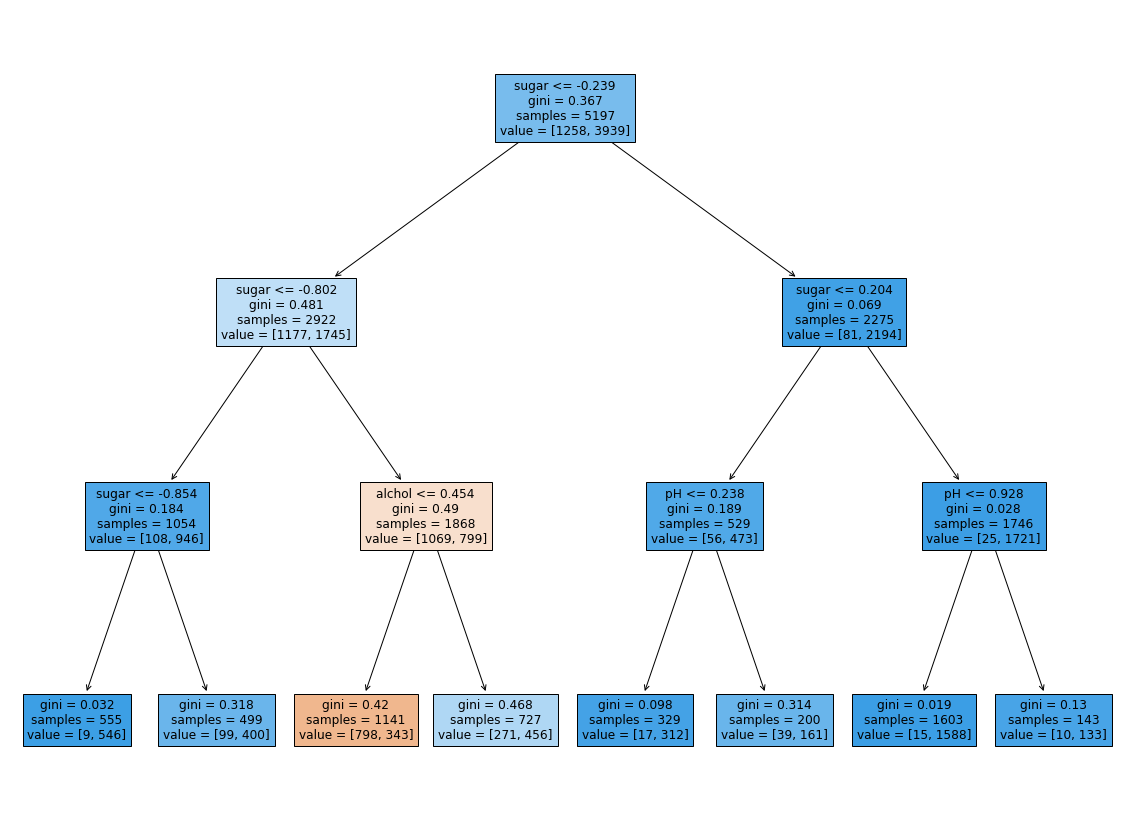

In [28]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alchol','sugar','pH'])
plt.show()

In [29]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


####예제 코드

0.8874350586877044
0.8615384615384616


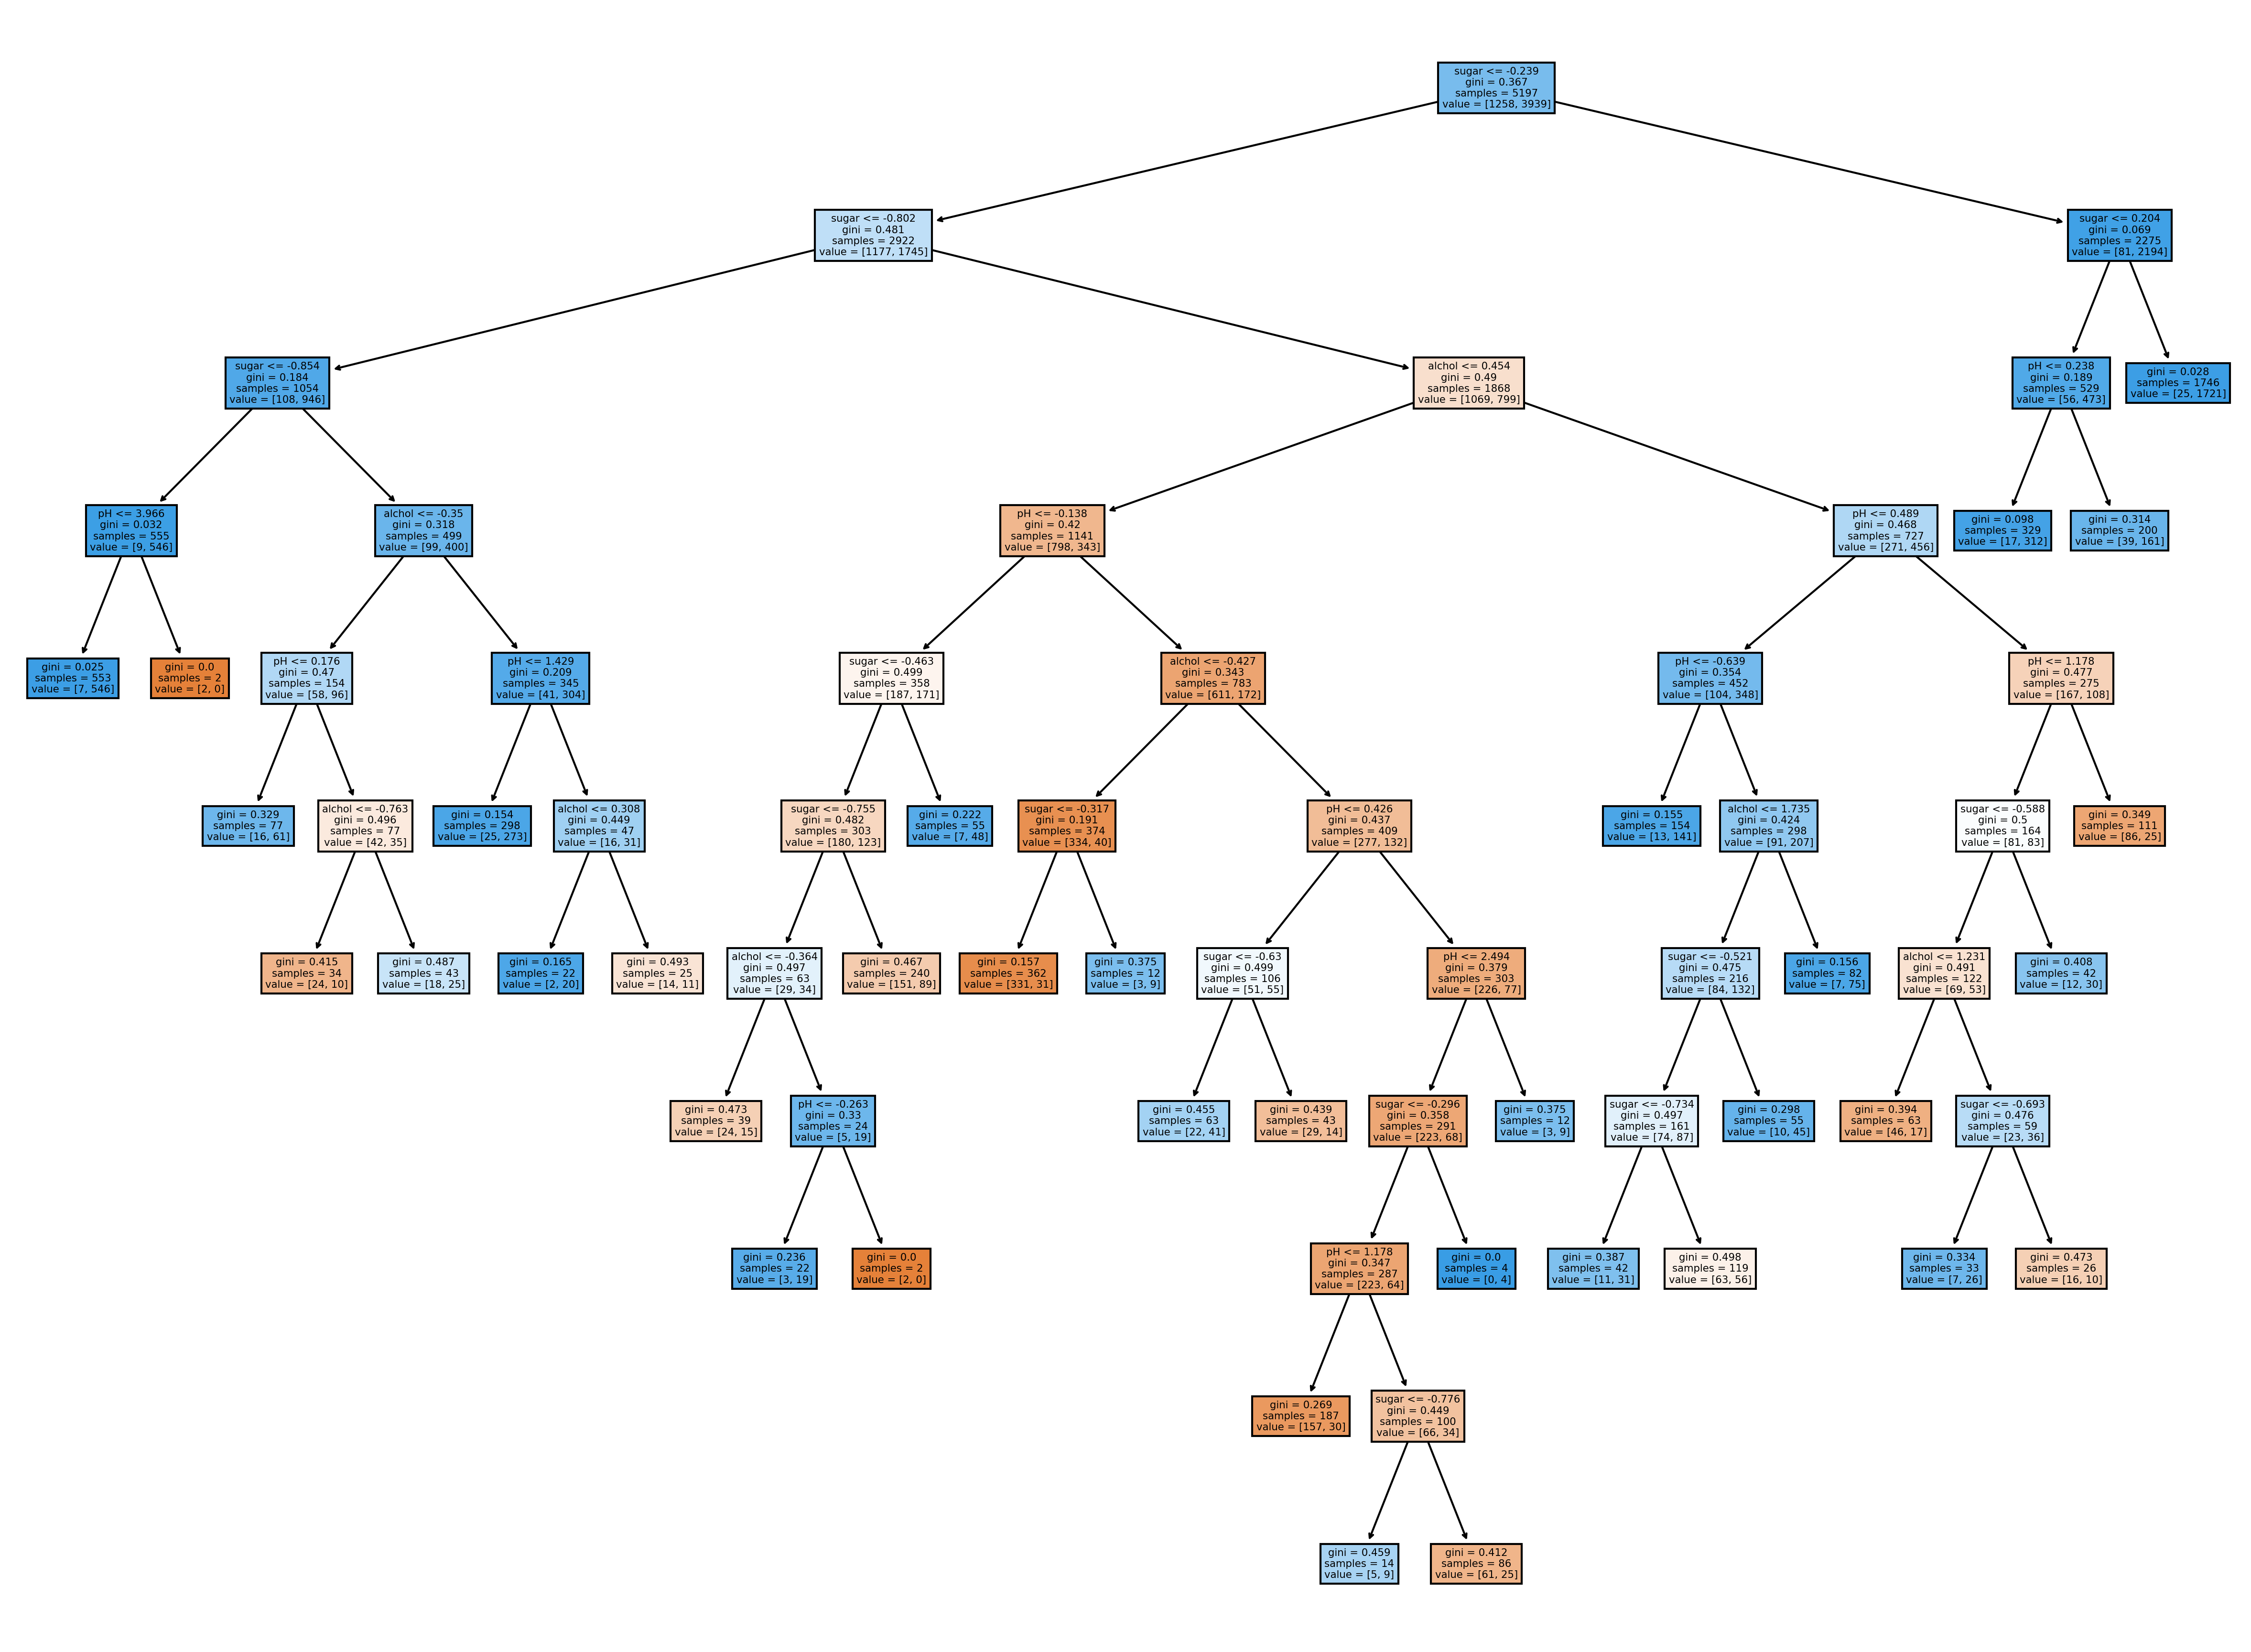

In [30]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005,random_state =42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))
plt.figure(figsize=(20,15),dpi=300)
plot_tree(dt,filled=True, feature_names=['alchol','sugar','pH'])
plt.show()